In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import random
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

# Loading Data

In [2]:
df = pd.read_csv('train.csv')
df.head(10)

,Product_id,Stall_no,instock_date,Market_Category,Customer_name,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price
0,BRAE2NF6JA5GUEXG,37.0,2015-08-22 18:36:12.000,2,Lillyann,Yes,Fashion,1,68,0.0,376.0,11.0,2983.0,4713.0,4185.947700
1,TUNE8SFB6RJN2HSD,38.0,2016-03-27 21:19:13.000,24,Klynn,Yes,Fashion,0,51,0.0,397.0,12.0,7495.0,10352.0,9271.490256
2,BRAEAR7WZPQGPBZU,9.0,2015-08-18 19:25:22.000,447,Ridge,Yes,Child_care,0,10,0.0,250.0,9.0,5752.0,7309.0,6785.701362
3,WATDZ2ZQ8JPDHCTJ,50.0,2016-03-28 21:53:01.000,23,Abran,Yes,Educational,2,48,0.0,144.0,13.0,5090.0,20814.0,13028.917824
4,JWSEBUKYQPMBZ3RK,7.0,2016-03-29 22:58:53.000,63,Dustyn,Yes,Repair,1,35,1.0,211.0,4.0,2430.0,9261.0,906.553935
5,SHIECAYW3VZWGZGX,23.0,2015-09-25 16:31:46.000,162,Brilee,No,Technology,1,49,0.0,633.0,6.0,3959.0,6104.0,5631.247872
6,SHOE4FZGGTE7HJXN,33.0,2014-12-08 12:25:52.000,462,Zoe,No,Cosmetics,3,57,0.0,263.0,13.0,2006.0,5257.0,3874.264992
7,SHOE6QGAYFFMBWG6,4.0,2015-09-22 14:29:06.000,23,Koby,Yes,Educational,1,67,0.0,104.0,15.0,3596.0,5921.0,4820.943600
8,KRTEBSMKCGFESHYX,26.0,2016-03-28 21:48:01.000,156,Tiffani,Yes,Child_care,0,53,0.0,310.0,6.0,6965.0,10194.0,8837.724240
9,BRAE3P8Y8UVRY43K,5.0,2015-08-19 22:16:52.000,275,Nigel,Yes,Child_care,0,84,1.0,321.0,8.0,1103.0,5430.0,530.761862


# Data Summary

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6368 entries, 0 to 6367
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product_id        6368 non-null   object 
 1   Stall_no          6363 non-null   float64
 2   instock_date      6368 non-null   object 
 3   Market_Category   6368 non-null   int64  
 4   Customer_name     6157 non-null   object 
 5   Loyalty_customer  6368 non-null   object 
 6   Product_Category  6368 non-null   object 
 7   Grade             6368 non-null   int64  
 8   Demand            6368 non-null   int64  
 9   Discount_avail    6330 non-null   float64
 10  charges_1         6170 non-null   float64
 11  charges_2 (%)     6163 non-null   float64
 12  Minimum_price     6330 non-null   float64
 13  Maximum_price     6025 non-null   float64
 14  Selling_Price     6327 non-null   float64
dtypes: float64(7), int64(3), object(5)
memory usage: 746.4+ KB


In [4]:
df.describe()

,Stall_no,Market_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price
count,6363.000000,6368.000000,6368.000000,6368.000000,6330.000000,6170.000000,6163.000000,6330.000000,6025.000000,6327.000000
mean,25.309445,199.340609,0.643687,50.921168,0.140442,264.514100,10.146195,3531.349763,6432.545892,4563.242592
std,14.328980,170.275570,1.025092,29.091922,0.347473,124.483056,4.318339,2194.729604,3716.177364,2979.102408
min,1.000000,0.000000,0.000000,1.000000,0.000000,100.000000,1.000000,1.000000,404.000000,-6062.470000
25%,13.000000,55.000000,0.000000,26.000000,0.000000,163.000000,7.000000,1879.250000,3918.000000,2450.005280
50%,25.000000,132.000000,0.000000,51.000000,0.000000,252.000000,10.000000,3157.500000,5634.000000,4210.384640
75%,37.000000,403.000000,2.000000,76.000000,0.000000,314.000000,14.000000,4697.000000,8126.000000,6167.643252
max,50.000000,471.000000,3.000000,100.000000,1.000000,649.000000,17.000000,17580.000000,58812.000000,22638.325941


In [5]:
df.shape

(6368, 15)

In [6]:
df['Stall_no'].isnull().sum()

5

In [7]:
df['Product_Category'].value_counts()

Pet_care       682
Repair         676
Child_care     658
Cosmetics      649
Hospitality    632
Technology     620
Organic        620
Home_decor     617
Educational    610
Fashion        604
Name: Product_Category, dtype: int64

In [8]:
df.corr()

,Stall_no,Market_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price
Stall_no,1.000000,-0.006145,-0.003449,0.004302,-0.019656,-0.010224,-0.004745,0.000123,0.008443,0.011733
Market_Category,-0.006145,1.000000,-0.036346,-0.018800,-0.003306,0.019009,0.024154,0.194787,0.134257,0.138711
Grade,-0.003449,-0.036346,1.000000,0.010107,-0.025232,-0.025316,-0.016644,-0.079583,0.164350,0.086450
Demand,0.004302,-0.018800,0.010107,1.000000,0.010230,-0.007370,0.017653,0.010283,0.003987,-0.000601
Discount_avail,-0.019656,-0.003306,-0.025232,0.010230,1.000000,-0.003899,0.018905,0.009817,-0.003918,-0.512457
charges_1,-0.010224,0.019009,-0.025316,-0.007370,-0.003899,1.000000,0.270625,0.019448,0.012169,0.053045
charges_2 (%),-0.004745,0.024154,-0.016644,0.017653,0.018905,0.270625,1.000000,0.005448,0.009816,0.009031
Minimum_price,0.000123,0.194787,-0.079583,0.010283,0.009817,0.019448,0.005448,1.000000,0.708038,0.700444
Maximum_price,0.008443,0.134257,0.164350,0.003987,-0.003918,0.012169,0.009816,0.708038,1.000000,0.766928
Selling_Price,0.011733,0.138711,0.086450,-0.000601,-0.512457,0.053045,0.009031,0.700444,0.766928,1.000000


In [9]:
grouped = df.groupby('Product_Category')


In [10]:
for name, group in grouped:
    print(name)
    print(group)

Child_care
            Product_id  Stall_no             instock_date  Market_Category  \
2     BRAEAR7WZPQGPBZU       9.0  2015-08-18 19:25:22.000              447   
8     KRTEBSMKCGFESHYX      26.0  2016-03-28 21:48:01.000              156   
9     BRAE3P8Y8UVRY43K       5.0  2015-08-19 22:16:52.000              275   
22    FABE9Q5X2QG4P5BW      27.0  2015-10-20 23:32:09.000              451   
36    NKCE5T3GVHYKZSDH       5.0  2015-11-19 03:54:47.000               14   
...                ...       ...                      ...              ...   
6295  TKSEFH49SBFGQYZ3      41.0  2016-03-12 13:41:48.000               57   
6317  WATEAYAHJ8CUCAYM      37.0  2014-11-12 19:41:19.000              457   
6327  NKCECZNMZJGZFS43      19.0  2016-01-05 06:05:57.000              115   
6336  BRAE5PKZFXE3MT9C      50.0  2015-08-20 19:37:05.000              110   
6364  SHOEF9G8Z4ZXF6WE      21.0  2015-02-11 15:09:26.000               55   

     Customer_name Loyalty_customer Product_Category

# Handling Null Values
*Null Values as per Product Catagory groups.*

In [11]:
print(grouped.get_group('Child_care').Stall_no.isnull().sum())

0


In [12]:
print(grouped.get_group('Pet_care').Stall_no.isnull().sum())

0


In [13]:
print(grouped.get_group('Repair').Stall_no.isnull().sum())

1


(array([ 4., 12.,  5.,  4., 10.,  7.,  2.,  2.,  3.,  1.]),
 array([ 7. ,  8.7, 10.4, 12.1, 13.8, 15.5, 17.2, 18.9, 20.6, 22.3, 24. ]),
 <a list of 10 Patch objects>)

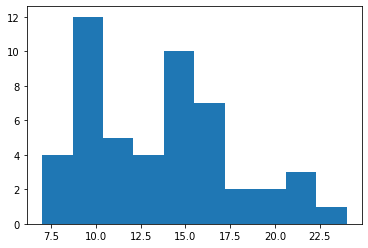

In [14]:
plt.hist(grouped.get_group('Repair').Stall_no.value_counts())

- **Heatmap for Null values of whole dataset**


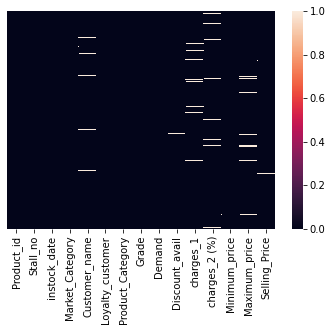

In [15]:
sns.heatmap(df.isnull(), yticklabels=False)

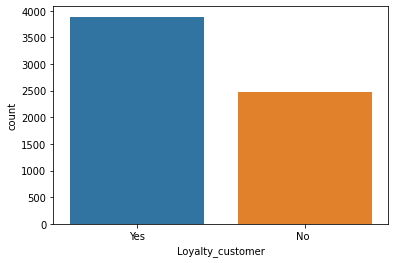

In [16]:
sns.countplot(x='Loyalty_customer', data=df)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


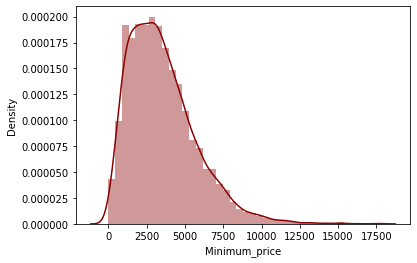

In [17]:
sns.distplot(df['Minimum_price'].dropna(), bins=40, color='darkred')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


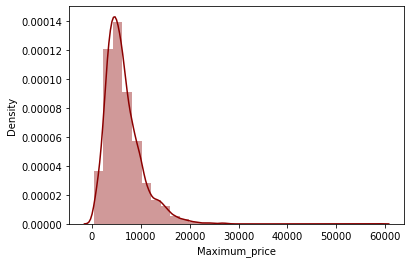

In [18]:
sns.distplot(df['Maximum_price'].dropna(), bins=30, color='darkred')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


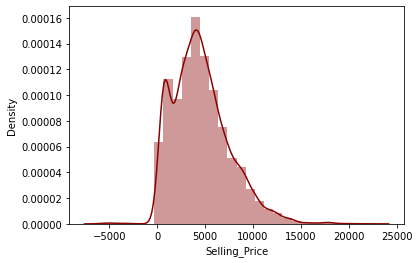

In [19]:
sns.distplot(df['Selling_Price'].dropna(), bins=30, color='darkred')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


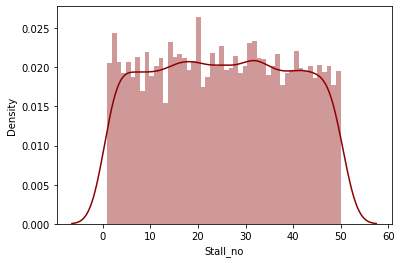

In [20]:
sns.distplot(df['Stall_no'], bins=50, color='darkred')

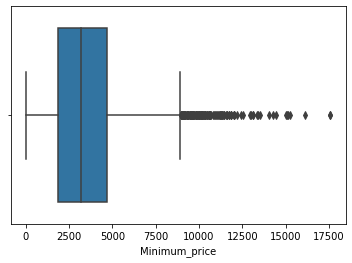

In [21]:
sns.boxplot(x = df['Minimum_price'])

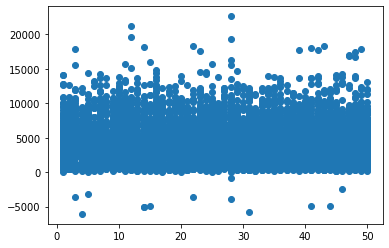

In [22]:
plt.scatter(df['Stall_no'], df['Selling_Price'])

In [23]:
df['Stall_no'].fillna(df.Stall_no.mode()[0], inplace=True)

In [24]:
df['Stall_no'].isnull().sum()

0

In [25]:
df['Stall_no'] = df['Stall_no'].astype(int)

In [26]:
df.head()

,Product_id,Stall_no,instock_date,Market_Category,Customer_name,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price
0,BRAE2NF6JA5GUEXG,37,2015-08-22 18:36:12.000,2,Lillyann,Yes,Fashion,1,68,0.0,376.0,11.0,2983.0,4713.0,4185.947700
1,TUNE8SFB6RJN2HSD,38,2016-03-27 21:19:13.000,24,Klynn,Yes,Fashion,0,51,0.0,397.0,12.0,7495.0,10352.0,9271.490256
2,BRAEAR7WZPQGPBZU,9,2015-08-18 19:25:22.000,447,Ridge,Yes,Child_care,0,10,0.0,250.0,9.0,5752.0,7309.0,6785.701362
3,WATDZ2ZQ8JPDHCTJ,50,2016-03-28 21:53:01.000,23,Abran,Yes,Educational,2,48,0.0,144.0,13.0,5090.0,20814.0,13028.917824
4,JWSEBUKYQPMBZ3RK,7,2016-03-29 22:58:53.000,63,Dustyn,Yes,Repair,1,35,1.0,211.0,4.0,2430.0,9261.0,906.553935


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6368 entries, 0 to 6367
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product_id        6368 non-null   object 
 1   Stall_no          6368 non-null   int64  
 2   instock_date      6368 non-null   object 
 3   Market_Category   6368 non-null   int64  
 4   Customer_name     6157 non-null   object 
 5   Loyalty_customer  6368 non-null   object 
 6   Product_Category  6368 non-null   object 
 7   Grade             6368 non-null   int64  
 8   Demand            6368 non-null   int64  
 9   Discount_avail    6330 non-null   float64
 10  charges_1         6170 non-null   float64
 11  charges_2 (%)     6163 non-null   float64
 12  Minimum_price     6330 non-null   float64
 13  Maximum_price     6025 non-null   float64
 14  Selling_Price     6327 non-null   float64
dtypes: float64(6), int64(4), object(5)
memory usage: 746.4+ KB


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


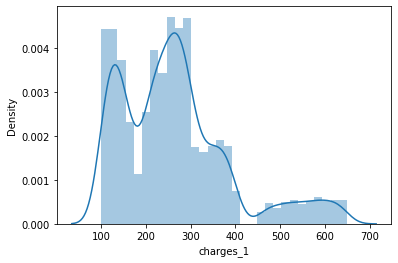

In [28]:
sns.distplot(df.charges_1.dropna(), bins=30)

In [29]:
df.Discount_avail.value_counts()

0.0    5441
1.0     889
Name: Discount_avail, dtype: int64

In [30]:
df['Selling_Price'] = df['Selling_Price'].apply(lambda x: np.abs(x))

In [31]:
df['Selling_Price'].describe()

count     6327.000000
mean      4580.406478
std       2952.640478
min          4.000000
25%       2461.805312
50%       4215.972992
75%       6167.643252
max      22638.325941
Name: Selling_Price, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


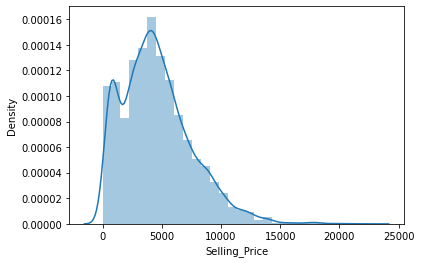

In [32]:
sns.distplot(df['Selling_Price'], bins = 30)

In [33]:
df['Selling_Price'].skew()

0.9131619719687308

In [34]:
df['Minimum_price'] = df['Minimum_price'].fillna((df.Minimum_price.shift() + df.Minimum_price.shift(-1))/2)
df['Maximum_price'] = df['Maximum_price'].fillna((df.Maximum_price.shift() + df.Maximum_price.shift(-1))/2)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6368 entries, 0 to 6367
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product_id        6368 non-null   object 
 1   Stall_no          6368 non-null   int64  
 2   instock_date      6368 non-null   object 
 3   Market_Category   6368 non-null   int64  
 4   Customer_name     6157 non-null   object 
 5   Loyalty_customer  6368 non-null   object 
 6   Product_Category  6368 non-null   object 
 7   Grade             6368 non-null   int64  
 8   Demand            6368 non-null   int64  
 9   Discount_avail    6330 non-null   float64
 10  charges_1         6170 non-null   float64
 11  charges_2 (%)     6163 non-null   float64
 12  Minimum_price     6368 non-null   float64
 13  Maximum_price     6334 non-null   float64
 14  Selling_Price     6327 non-null   float64
dtypes: float64(6), int64(4), object(5)
memory usage: 746.4+ KB


In [35]:
df['Maximum_price'].fillna(df.Maximum_price.mean(), inplace=True)

In [36]:
for i in df[df['Selling_Price'].isnull()].index.tolist():
    df['Selling_Price'].iloc[i] = float(random.randint(min(df['Minimum_price'].iloc[i],df['Maximum_price'].iloc[i]), max(df['Minimum_price'].iloc[i],df['Maximum_price'].iloc[i])))
                                        

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [37]:
df['Selling_Price'].describe()

count     6368.000000
mean      4581.169408
std       2953.202391
min          4.000000
25%       2462.074752
50%       4212.909317
75%       6169.785301
max      22638.325941
Name: Selling_Price, dtype: float64

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6368 entries, 0 to 6367
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product_id        6368 non-null   object 
 1   Stall_no          6368 non-null   int64  
 2   instock_date      6368 non-null   object 
 3   Market_Category   6368 non-null   int64  
 4   Customer_name     6157 non-null   object 
 5   Loyalty_customer  6368 non-null   object 
 6   Product_Category  6368 non-null   object 
 7   Grade             6368 non-null   int64  
 8   Demand            6368 non-null   int64  
 9   Discount_avail    6330 non-null   float64
 10  charges_1         6170 non-null   float64
 11  charges_2 (%)     6163 non-null   float64
 12  Minimum_price     6368 non-null   float64
 13  Maximum_price     6368 non-null   float64
 14  Selling_Price     6368 non-null   float64
dtypes: float64(6), int64(4), object(5)
memory usage: 746.4+ KB


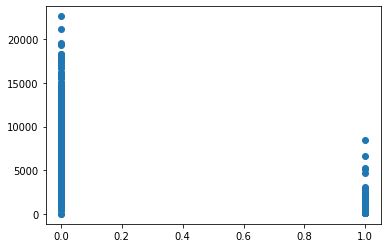

In [39]:
plt.scatter(df.Discount_avail, df.Selling_Price)

In [40]:
for i in df[df['Discount_avail'].isnull()].index.tolist():
    if df.Selling_Price.iloc[i] > 1000.0 or df.Selling_Price.iloc[i] < 5000.0:
        df['Discount_avail'].iloc[i] = 1.0
    else:
        df['Discount_avail'].iloc[i] = 0.0

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6368 entries, 0 to 6367
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product_id        6368 non-null   object 
 1   Stall_no          6368 non-null   int64  
 2   instock_date      6368 non-null   object 
 3   Market_Category   6368 non-null   int64  
 4   Customer_name     6157 non-null   object 
 5   Loyalty_customer  6368 non-null   object 
 6   Product_Category  6368 non-null   object 
 7   Grade             6368 non-null   int64  
 8   Demand            6368 non-null   int64  
 9   Discount_avail    6368 non-null   float64
 10  charges_1         6170 non-null   float64
 11  charges_2 (%)     6163 non-null   float64
 12  Minimum_price     6368 non-null   float64
 13  Maximum_price     6368 non-null   float64
 14  Selling_Price     6368 non-null   float64
dtypes: float64(6), int64(4), object(5)
memory usage: 746.4+ KB


In [42]:
df.head()

,Product_id,Stall_no,instock_date,Market_Category,Customer_name,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price
0,BRAE2NF6JA5GUEXG,37,2015-08-22 18:36:12.000,2,Lillyann,Yes,Fashion,1,68,0.0,376.0,11.0,2983.0,4713.0,4185.947700
1,TUNE8SFB6RJN2HSD,38,2016-03-27 21:19:13.000,24,Klynn,Yes,Fashion,0,51,0.0,397.0,12.0,7495.0,10352.0,9271.490256
2,BRAEAR7WZPQGPBZU,9,2015-08-18 19:25:22.000,447,Ridge,Yes,Child_care,0,10,0.0,250.0,9.0,5752.0,7309.0,6785.701362
3,WATDZ2ZQ8JPDHCTJ,50,2016-03-28 21:53:01.000,23,Abran,Yes,Educational,2,48,0.0,144.0,13.0,5090.0,20814.0,13028.917824
4,JWSEBUKYQPMBZ3RK,7,2016-03-29 22:58:53.000,63,Dustyn,Yes,Repair,1,35,1.0,211.0,4.0,2430.0,9261.0,906.553935


In [43]:
le = LabelEncoder()
df['Product_Category'] = le.fit_transform(df['Product_Category'])
df.head()

,Product_id,Stall_no,instock_date,Market_Category,Customer_name,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price
0,BRAE2NF6JA5GUEXG,37,2015-08-22 18:36:12.000,2,Lillyann,Yes,3,1,68,0.0,376.0,11.0,2983.0,4713.0,4185.947700
1,TUNE8SFB6RJN2HSD,38,2016-03-27 21:19:13.000,24,Klynn,Yes,3,0,51,0.0,397.0,12.0,7495.0,10352.0,9271.490256
2,BRAEAR7WZPQGPBZU,9,2015-08-18 19:25:22.000,447,Ridge,Yes,0,0,10,0.0,250.0,9.0,5752.0,7309.0,6785.701362
3,WATDZ2ZQ8JPDHCTJ,50,2016-03-28 21:53:01.000,23,Abran,Yes,2,2,48,0.0,144.0,13.0,5090.0,20814.0,13028.917824
4,JWSEBUKYQPMBZ3RK,7,2016-03-29 22:58:53.000,63,Dustyn,Yes,8,1,35,1.0,211.0,4.0,2430.0,9261.0,906.553935


In [44]:
df['Loyalty_customer'] = le.fit_transform(df['Loyalty_customer'])

In [45]:
df.head()

,Product_id,Stall_no,instock_date,Market_Category,Customer_name,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price
0,BRAE2NF6JA5GUEXG,37,2015-08-22 18:36:12.000,2,Lillyann,1,3,1,68,0.0,376.0,11.0,2983.0,4713.0,4185.947700
1,TUNE8SFB6RJN2HSD,38,2016-03-27 21:19:13.000,24,Klynn,1,3,0,51,0.0,397.0,12.0,7495.0,10352.0,9271.490256
2,BRAEAR7WZPQGPBZU,9,2015-08-18 19:25:22.000,447,Ridge,1,0,0,10,0.0,250.0,9.0,5752.0,7309.0,6785.701362
3,WATDZ2ZQ8JPDHCTJ,50,2016-03-28 21:53:01.000,23,Abran,1,2,2,48,0.0,144.0,13.0,5090.0,20814.0,13028.917824
4,JWSEBUKYQPMBZ3RK,7,2016-03-29 22:58:53.000,63,Dustyn,1,8,1,35,1.0,211.0,4.0,2430.0,9261.0,906.553935


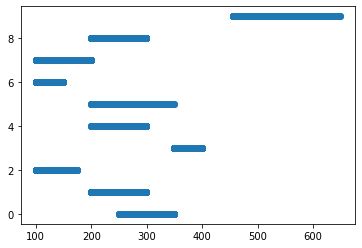

In [46]:
plt.scatter(df.charges_1, df.Product_Category)

In [47]:
for i in df[df['charges_1'].isnull()].index.tolist():
    if df.Product_Category.iloc[i] == 0 :
        df['charges_1'].iloc[i] = float(random.randint(250,351))
    elif df.Product_Category.iloc[i] == 1 :
        df['charges_1'].iloc[i] = float(random.randint(200,301))
    elif df.Product_Category.iloc[i] == 2 :
        df['charges_1'].iloc[i] = float(random.randint(100,190))
    elif df.Product_Category.iloc[i] == 3 :
        df['charges_1'].iloc[i] = float(random.randint(350,400))
    elif df.Product_Category.iloc[i] == 4 :
        df['charges_1'].iloc[i] = float(random.randint(200,300))
    elif df.Product_Category.iloc[i] == 5 :
        df['charges_1'].iloc[i] = float(random.randint(200,350))
    elif df.Product_Category.iloc[i] == 6 :
        df['charges_1'].iloc[i] = float(random.randint(100,160))
    elif df.Product_Category.iloc[i] == 7 :
        df['charges_1'].iloc[i] = float(random.randint(100,210))
    elif df.Product_Category.iloc[i] == 8 :
        df['charges_1'].iloc[i] = float(random.randint(200,300))
    elif df.Product_Category.iloc[i] == 9 :
        df['charges_1'].iloc[i] = float(random.randint(450,650))

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [48]:
df.charges_1.describe()


count    6368.000000
mean      265.082443
std       124.438782
min       100.000000
25%       164.000000
50%       253.000000
75%       316.000000
max       649.000000
Name: charges_1, dtype: float64

In [49]:
df['charges_2 (%)'] = df['charges_2 (%)'].fillna((df['charges_2 (%)'].shift() + df['charges_2 (%)'].shift(-1))/2)

In [50]:
df['charges_2 (%)'] = df['charges_2 (%)'].fillna(df['charges_2 (%)'].mean())

In [51]:
df['charges_2 (%)'].describe()

count    6368.000000
mean       10.159012
std         4.280266
min         1.000000
25%         7.000000
50%        10.000000
75%        14.000000
max        17.000000
Name: charges_2 (%), dtype: float64

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6368 entries, 0 to 6367
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product_id        6368 non-null   object 
 1   Stall_no          6368 non-null   int64  
 2   instock_date      6368 non-null   object 
 3   Market_Category   6368 non-null   int64  
 4   Customer_name     6157 non-null   object 
 5   Loyalty_customer  6368 non-null   int64  
 6   Product_Category  6368 non-null   int64  
 7   Grade             6368 non-null   int64  
 8   Demand            6368 non-null   int64  
 9   Discount_avail    6368 non-null   float64
 10  charges_1         6368 non-null   float64
 11  charges_2 (%)     6368 non-null   float64
 12  Minimum_price     6368 non-null   float64
 13  Maximum_price     6368 non-null   float64
 14  Selling_Price     6368 non-null   float64
dtypes: float64(6), int64(6), object(3)
memory usage: 746.4+ KB


In [53]:
df.head(10)

,Product_id,Stall_no,instock_date,Market_Category,Customer_name,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price
0,BRAE2NF6JA5GUEXG,37,2015-08-22 18:36:12.000,2,Lillyann,1,3,1,68,0.0,376.0,11.0,2983.0,4713.0,4185.947700
1,TUNE8SFB6RJN2HSD,38,2016-03-27 21:19:13.000,24,Klynn,1,3,0,51,0.0,397.0,12.0,7495.0,10352.0,9271.490256
2,BRAEAR7WZPQGPBZU,9,2015-08-18 19:25:22.000,447,Ridge,1,0,0,10,0.0,250.0,9.0,5752.0,7309.0,6785.701362
3,WATDZ2ZQ8JPDHCTJ,50,2016-03-28 21:53:01.000,23,Abran,1,2,2,48,0.0,144.0,13.0,5090.0,20814.0,13028.917824
4,JWSEBUKYQPMBZ3RK,7,2016-03-29 22:58:53.000,63,Dustyn,1,8,1,35,1.0,211.0,4.0,2430.0,9261.0,906.553935
5,SHIECAYW3VZWGZGX,23,2015-09-25 16:31:46.000,162,Brilee,0,9,1,49,0.0,633.0,6.0,3959.0,6104.0,5631.247872
6,SHOE4FZGGTE7HJXN,33,2014-12-08 12:25:52.000,462,Zoe,0,1,3,57,0.0,263.0,13.0,2006.0,5257.0,3874.264992
7,SHOE6QGAYFFMBWG6,4,2015-09-22 14:29:06.000,23,Koby,1,2,1,67,0.0,104.0,15.0,3596.0,5921.0,4820.943600
8,KRTEBSMKCGFESHYX,26,2016-03-28 21:48:01.000,156,Tiffani,1,0,0,53,0.0,310.0,6.0,6965.0,10194.0,8837.724240
9,BRAE3P8Y8UVRY43K,5,2015-08-19 22:16:52.000,275,Nigel,1,0,0,84,1.0,321.0,8.0,1103.0,5430.0,530.761862


In [54]:
df.corr()

,Stall_no,Market_Category,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price
Stall_no,1.000000,-0.006337,0.007608,-0.011125,-0.003266,0.004140,-0.020082,-0.009040,-0.002889,-0.000480,0.007923,0.011507
Market_Category,-0.006337,1.000000,0.034055,-0.000565,-0.036346,-0.018800,-0.002029,0.019364,0.022492,0.194237,0.126698,0.140028
Loyalty_customer,0.007608,0.034055,1.000000,-0.017918,0.026700,0.005517,-0.021765,0.005866,0.012242,0.092085,0.115133,0.097739
Product_Category,-0.011125,-0.000565,-0.017918,1.000000,0.010363,-0.021062,-0.030050,0.212312,-0.469318,0.002641,-0.014530,0.016144
Grade,-0.003266,-0.036346,0.026700,0.010363,1.000000,0.010107,-0.023761,-0.024554,-0.014282,-0.078162,0.155937,0.083777
Demand,0.004140,-0.018800,0.005517,-0.021062,0.010107,1.000000,0.004042,-0.005667,0.017377,0.010037,0.005340,-0.000943
Discount_avail,-0.020082,-0.002029,-0.021765,-0.030050,-0.023761,0.004042,1.000000,-0.001401,0.018909,0.004912,-0.010638,-0.510599
charges_1,-0.009040,0.019364,0.005866,0.212312,-0.024554,-0.005667,-0.001401,1.000000,0.263838,0.019131,0.011530,0.052298
charges_2 (%),-0.002889,0.022492,0.012242,-0.469318,-0.014282,0.017377,0.018909,0.263838,1.000000,0.002179,0.005871,0.007215
Minimum_price,-0.000480,0.194237,0.092085,0.002641,-0.078162,0.010037,0.004912,0.019131,0.002179,1.000000,0.679003,0.702702


# Model Training

In [57]:
X = df.drop(['Customer_name', 'Product_id'], axis = 1)

In [56]:
X.head()

,Stall_no,instock_date,Market_Category,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price
0,37,2015-08-22 18:36:12.000,2,1,3,1,68,0.0,376.0,11.0,2983.0,4713.0,4185.947700
1,38,2016-03-27 21:19:13.000,24,1,3,0,51,0.0,397.0,12.0,7495.0,10352.0,9271.490256
2,9,2015-08-18 19:25:22.000,447,1,0,0,10,0.0,250.0,9.0,5752.0,7309.0,6785.701362
3,50,2016-03-28 21:53:01.000,23,1,2,2,48,0.0,144.0,13.0,5090.0,20814.0,13028.917824
4,7,2016-03-29 22:58:53.000,63,1,8,1,35,1.0,211.0,4.0,2430.0,9261.0,906.553935


In [58]:
y = X['Selling_Price']

In [59]:
X.drop(['Selling_Price'], axis=1, inplace=True)

In [60]:
y.head()

0     4185.947700
1     9271.490256
2     6785.701362
3    13028.917824
4      906.553935
Name: Selling_Price, dtype: float64

In [61]:
X.head()

,Stall_no,instock_date,Market_Category,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price
0,37,2015-08-22 18:36:12.000,2,1,3,1,68,0.0,376.0,11.0,2983.0,4713.0
1,38,2016-03-27 21:19:13.000,24,1,3,0,51,0.0,397.0,12.0,7495.0,10352.0
2,9,2015-08-18 19:25:22.000,447,1,0,0,10,0.0,250.0,9.0,5752.0,7309.0
3,50,2016-03-28 21:53:01.000,23,1,2,2,48,0.0,144.0,13.0,5090.0,20814.0
4,7,2016-03-29 22:58:53.000,63,1,8,1,35,1.0,211.0,4.0,2430.0,9261.0


In [62]:
X.instock_date = pd.to_datetime(X.instock_date)

In [63]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6368 entries, 0 to 6367
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Stall_no          6368 non-null   int64         
 1   instock_date      6368 non-null   datetime64[ns]
 2   Market_Category   6368 non-null   int64         
 3   Loyalty_customer  6368 non-null   int64         
 4   Product_Category  6368 non-null   int64         
 5   Grade             6368 non-null   int64         
 6   Demand            6368 non-null   int64         
 7   Discount_avail    6368 non-null   float64       
 8   charges_1         6368 non-null   float64       
 9   charges_2 (%)     6368 non-null   float64       
 10  Minimum_price     6368 non-null   float64       
 11  Maximum_price     6368 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(6)
memory usage: 597.1 KB


In [64]:
X['year'] = X['instock_date'].dt.year
# X['month'] = X['instock_date'].dt.month
# X['day'] = X['instock_date'].dt.day
X.head()

,Stall_no,instock_date,Market_Category,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,year
0,37,2015-08-22 18:36:12,2,1,3,1,68,0.0,376.0,11.0,2983.0,4713.0,2015
1,38,2016-03-27 21:19:13,24,1,3,0,51,0.0,397.0,12.0,7495.0,10352.0,2016
2,9,2015-08-18 19:25:22,447,1,0,0,10,0.0,250.0,9.0,5752.0,7309.0,2015
3,50,2016-03-28 21:53:01,23,1,2,2,48,0.0,144.0,13.0,5090.0,20814.0,2016
4,7,2016-03-29 22:58:53,63,1,8,1,35,1.0,211.0,4.0,2430.0,9261.0,2016


In [65]:
X['year'].value_counts()

2015    4216
2016    2093
2014      59
Name: year, dtype: int64

In [66]:
X['year'] = le.fit_transform(X['year'])
X.head()

,Stall_no,instock_date,Market_Category,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,year
0,37,2015-08-22 18:36:12,2,1,3,1,68,0.0,376.0,11.0,2983.0,4713.0,1
1,38,2016-03-27 21:19:13,24,1,3,0,51,0.0,397.0,12.0,7495.0,10352.0,2
2,9,2015-08-18 19:25:22,447,1,0,0,10,0.0,250.0,9.0,5752.0,7309.0,1
3,50,2016-03-28 21:53:01,23,1,2,2,48,0.0,144.0,13.0,5090.0,20814.0,2
4,7,2016-03-29 22:58:53,63,1,8,1,35,1.0,211.0,4.0,2430.0,9261.0,2


In [67]:
X.drop(['instock_date'], axis=1, inplace=True)


In [68]:
X.head()

,Stall_no,Market_Category,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,year
0,37,2,1,3,1,68,0.0,376.0,11.0,2983.0,4713.0,1
1,38,24,1,3,0,51,0.0,397.0,12.0,7495.0,10352.0,2
2,9,447,1,0,0,10,0.0,250.0,9.0,5752.0,7309.0,1
3,50,23,1,2,2,48,0.0,144.0,13.0,5090.0,20814.0,2
4,7,63,1,8,1,35,1.0,211.0,4.0,2430.0,9261.0,2


In [69]:
lr = LinearRegression()
X['Minimum_price'] = np.log(X['Minimum_price'])
X['Maximum_price'] = np.log(X['Maximum_price'])


In [70]:
X.head()

,Stall_no,Market_Category,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,year
0,37,2,1,3,1,68,0.0,376.0,11.0,8.000685,8.458080,1
1,38,24,1,3,0,51,0.0,397.0,12.0,8.921991,9.244935,2
2,9,447,1,0,0,10,0.0,250.0,9.0,8.657303,8.896862,1
3,50,23,1,2,2,48,0.0,144.0,13.0,8.535033,9.943381,2
4,7,63,1,8,1,35,1.0,211.0,4.0,7.795647,9.133567,2


In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [72]:
lr.fit(X_train, np.log(y_train))

LinearRegression()

In [73]:
y_predict = lr.predict(X_test)

In [74]:
rsquared = r2_score(y_test, np.exp(y_predict))

In [75]:
rsquared

0.9582626306622491

In [76]:
test_df = pd.read_csv('test.csv')
test_df.head()

,Product_id,Stall_no,instock_date,Market_Category,Customer_name,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price
0,SCHE4YSTDVPVZVXW,39.0,2016-01-13 07:45:08.000,205,Ivanka,No,Fashion,0,90,0,380.0,16.0,2576.0,3340
1,ACCEGCATKHNRXUHW,49.0,2015-08-23 20:37:05.000,3,Isaak,Yes,Fashion,0,87,0,393.0,16.0,1202.0,1955
2,NKCE6GJ5XVJDXNNZ,1.0,2015-11-14 18:12:39.000,183,Analiese,No,Technology,2,55,0,493.0,9.0,7175.0,15715
3,NKCEB8BK3ZXDHDHM,8.0,2015-11-21 04:56:19.000,358,Rusty,Yes,Child_care,3,86,0,303.0,16.0,5404.0,13078
4,TOPEFDXSAHRNPF94,33.0,2015-05-06 15:09:46.000,167,Eloise,No,Technology,0,27,0,567.0,16.0,4069.0,6244


In [77]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3430 entries, 0 to 3429
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product_id        3430 non-null   object 
 1   Stall_no          3429 non-null   float64
 2   instock_date      3430 non-null   object 
 3   Market_Category   3430 non-null   int64  
 4   Customer_name     3377 non-null   object 
 5   Loyalty_customer  3430 non-null   object 
 6   Product_Category  3430 non-null   object 
 7   Grade             3430 non-null   int64  
 8   Demand            3430 non-null   int64  
 9   Discount_avail    3430 non-null   int64  
 10  charges_1         3394 non-null   float64
 11  charges_2 (%)     3425 non-null   float64
 12  Minimum_price     3416 non-null   float64
 13  Maximum_price     3430 non-null   int64  
dtypes: float64(4), int64(5), object(5)
memory usage: 375.3+ KB


In [78]:
df2 = test_df['Product_id']

In [79]:
df2.head()

0    SCHE4YSTDVPVZVXW
1    ACCEGCATKHNRXUHW
2    NKCE6GJ5XVJDXNNZ
3    NKCEB8BK3ZXDHDHM
4    TOPEFDXSAHRNPF94
Name: Product_id, dtype: object

In [80]:
test_df.drop(['Product_id', 'Customer_name'], axis = 1, inplace=True)


In [81]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3430 entries, 0 to 3429
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Stall_no          3429 non-null   float64
 1   instock_date      3430 non-null   object 
 2   Market_Category   3430 non-null   int64  
 3   Loyalty_customer  3430 non-null   object 
 4   Product_Category  3430 non-null   object 
 5   Grade             3430 non-null   int64  
 6   Demand            3430 non-null   int64  
 7   Discount_avail    3430 non-null   int64  
 8   charges_1         3394 non-null   float64
 9   charges_2 (%)     3425 non-null   float64
 10  Minimum_price     3416 non-null   float64
 11  Maximum_price     3430 non-null   int64  
dtypes: float64(4), int64(5), object(3)
memory usage: 321.7+ KB


In [82]:
test_df['Stall_no'].fillna(test_df.Stall_no.mode()[0], inplace=True)

In [83]:
test_df['Stall_no'] = test_df['Stall_no'].astype(int)

In [84]:
test_df['Minimum_price'] = test_df['Minimum_price'].fillna((test_df.Minimum_price.shift() + test_df.Minimum_price.shift(-1))/2)
test_df['Maximum_price'] = test_df['Maximum_price'].fillna((test_df.Maximum_price.shift() + test_df.Maximum_price.shift(-1))/2)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3430 entries, 0 to 3429
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Stall_no          3430 non-null   int64  
 1   instock_date      3430 non-null   object 
 2   Market_Category   3430 non-null   int64  
 3   Loyalty_customer  3430 non-null   object 
 4   Product_Category  3430 non-null   object 
 5   Grade             3430 non-null   int64  
 6   Demand            3430 non-null   int64  
 7   Discount_avail    3430 non-null   int64  
 8   charges_1         3394 non-null   float64
 9   charges_2 (%)     3425 non-null   float64
 10  Minimum_price     3430 non-null   float64
 11  Maximum_price     3430 non-null   int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 321.7+ KB


In [85]:
test_df['Product_Category'] = le.fit_transform(test_df['Product_Category'])
test_df['Loyalty_customer'] = le.fit_transform(test_df['Loyalty_customer'])
test_df.head()

,Stall_no,instock_date,Market_Category,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price
0,39,2016-01-13 07:45:08.000,205,0,3,0,90,0,380.0,16.0,2576.0,3340
1,49,2015-08-23 20:37:05.000,3,1,3,0,87,0,393.0,16.0,1202.0,1955
2,1,2015-11-14 18:12:39.000,183,0,9,2,55,0,493.0,9.0,7175.0,15715
3,8,2015-11-21 04:56:19.000,358,1,0,3,86,0,303.0,16.0,5404.0,13078
4,33,2015-05-06 15:09:46.000,167,0,9,0,27,0,567.0,16.0,4069.0,6244


In [86]:
for i in test_df[test_df['charges_1'].isnull()].index.tolist():
    if test_df.Product_Category.iloc[i] == 0 :
        test_df['charges_1'].iloc[i] = float(random.randint(250,351))
    elif test_df.Product_Category.iloc[i] == 1 :
        test_df['charges_1'].iloc[i] = float(random.randint(200,301))
    elif test_df.Product_Category.iloc[i] == 2 :
        test_df['charges_1'].iloc[i] = float(random.randint(100,190))
    elif test_df.Product_Category.iloc[i] == 3 :
        test_df['charges_1'].iloc[i] = float(random.randint(350,400))
    elif test_df.Product_Category.iloc[i] == 4 :
        test_df['charges_1'].iloc[i] = float(random.randint(200,300))
    elif test_df.Product_Category.iloc[i] == 5 :
        test_df['charges_1'].iloc[i] = float(random.randint(200,350))
    elif test_df.Product_Category.iloc[i] == 6 :
        test_df['charges_1'].iloc[i] = float(random.randint(100,160))
    elif test_df.Product_Category.iloc[i] == 7 :
        test_df['charges_1'].iloc[i] = float(random.randint(100,210))
    elif test_df.Product_Category.iloc[i] == 8 :
        test_df['charges_1'].iloc[i] = float(random.randint(200,300))
    elif test_df.Product_Category.iloc[i] == 9 :
        test_df['charges_1'].iloc[i] = float(random.randint(450,650))

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [87]:
test_df['charges_2 (%)'] = test_df['charges_2 (%)'].fillna((test_df['charges_2 (%)'].shift() + test_df['charges_2 (%)'].shift(-1))/2)

In [88]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3430 entries, 0 to 3429
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Stall_no          3430 non-null   int64  
 1   instock_date      3430 non-null   object 
 2   Market_Category   3430 non-null   int64  
 3   Loyalty_customer  3430 non-null   int64  
 4   Product_Category  3430 non-null   int64  
 5   Grade             3430 non-null   int64  
 6   Demand            3430 non-null   int64  
 7   Discount_avail    3430 non-null   int64  
 8   charges_1         3430 non-null   float64
 9   charges_2 (%)     3430 non-null   float64
 10  Minimum_price     3430 non-null   float64
 11  Maximum_price     3430 non-null   int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 321.7+ KB


In [89]:
test_df.instock_date = pd.to_datetime(test_df.instock_date)

In [90]:
test_df['year'] = test_df['instock_date'].dt.year
# test_df['month'] = test_df['instock_date'].dt.month
# test_df['day'] = test_df['instock_date'].dt.day

In [91]:
test_df['year'] = le.fit_transform(test_df['year'])
test_df.drop(['instock_date'], axis=1, inplace=True)
test_df['Minimum_price'] = np.log(test_df['Minimum_price'])
test_df['Maximum_price'] = np.log(test_df['Maximum_price'])
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3430 entries, 0 to 3429
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Stall_no          3430 non-null   int64  
 1   Market_Category   3430 non-null   int64  
 2   Loyalty_customer  3430 non-null   int64  
 3   Product_Category  3430 non-null   int64  
 4   Grade             3430 non-null   int64  
 5   Demand            3430 non-null   int64  
 6   Discount_avail    3430 non-null   int64  
 7   charges_1         3430 non-null   float64
 8   charges_2 (%)     3430 non-null   float64
 9   Minimum_price     3430 non-null   float64
 10  Maximum_price     3430 non-null   float64
 11  year              3430 non-null   int64  
dtypes: float64(4), int64(8)
memory usage: 321.7 KB


In [92]:
test_df['Discount_avail'] = test_df['Discount_avail'].astype(float)

In [93]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3430 entries, 0 to 3429
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Stall_no          3430 non-null   int64  
 1   Market_Category   3430 non-null   int64  
 2   Loyalty_customer  3430 non-null   int64  
 3   Product_Category  3430 non-null   int64  
 4   Grade             3430 non-null   int64  
 5   Demand            3430 non-null   int64  
 6   Discount_avail    3430 non-null   float64
 7   charges_1         3430 non-null   float64
 8   charges_2 (%)     3430 non-null   float64
 9   Minimum_price     3430 non-null   float64
 10  Maximum_price     3430 non-null   float64
 11  year              3430 non-null   int64  
dtypes: float64(5), int64(7)
memory usage: 321.7 KB


In [94]:
test_df.head()

,Stall_no,Market_Category,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,year
0,39,205,0,3,0,90,0.0,380.0,16.0,7.853993,8.113726,2
1,49,3,1,3,0,87,0.0,393.0,16.0,7.091742,7.578145,1
2,1,183,0,9,2,55,0.0,493.0,9.0,8.878358,9.662371,1
3,8,358,1,0,3,86,0.0,303.0,16.0,8.594895,9.478687,1
4,33,167,0,9,0,27,0.0,567.0,16.0,8.311153,8.739376,1


In [95]:
X_test.head()

,Stall_no,Market_Category,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,year
3017,45,162,1,7,1,72,1.0,189.0,6.0,8.492286,8.867146,1
1853,27,23,0,5,2,6,0.0,327.0,9.0,7.224753,7.604894,1
3166,47,119,1,9,2,79,0.0,546.0,6.0,7.010312,7.906547,2
2949,41,13,1,4,3,67,0.0,290.0,15.0,5.823046,7.757479,1
4696,12,358,0,8,3,67,0.0,224.0,5.0,8.668712,9.666118,1


In [96]:
predict = lr.predict(test_df)

In [97]:
predict = np.exp(predict)


In [98]:
predict

array([ 3292.08988863,  1886.93625202, 12116.72401308, ...,
        4289.09900168,  3577.67869516,  1042.28395941])

In [107]:
##df3['Selling_Price'] = pd.Series(predict)

In [103]:
df3 = pd.DataFrame(data = predict,    
                  columns = ['Selling_Price']) 

In [104]:
df3

,Selling_Price
0,3292.089889
1,1886.936252
2,12116.724013
3,9653.145868
4,5825.567339
...,...
3425,4004.528185
3426,9270.075792
3427,4289.099002
3428,3577.678695


In [105]:
df4 = pd.DataFrame(data=df2, columns = ['Product_id'])

In [106]:
df4.head()

,Product_id
0,SCHE4YSTDVPVZVXW
1,ACCEGCATKHNRXUHW
2,NKCE6GJ5XVJDXNNZ
3,NKCEB8BK3ZXDHDHM
4,TOPEFDXSAHRNPF94


In [108]:
df4['Selling_Price'] = df3['Selling_Price']

In [109]:
df4.head()

,Product_id,Selling_Price
0,SCHE4YSTDVPVZVXW,3292.089889
1,ACCEGCATKHNRXUHW,1886.936252
2,NKCE6GJ5XVJDXNNZ,12116.724013
3,NKCEB8BK3ZXDHDHM,9653.145868
4,TOPEFDXSAHRNPF94,5825.567339


In [110]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3430 entries, 0 to 3429
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Product_id     3430 non-null   object 
 1   Selling_Price  3430 non-null   float64
dtypes: float64(1), object(1)
memory usage: 53.7+ KB


In [111]:
df4.to_csv('submission.csv', index=False)